### Classification with sklearn --- Lending Club Loan Data

In [1]:
# see the value of multiple statements at once.
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
## import everything here

# pd and np
import pandas as pd
import numpy as np
np.set_printoptions(precision=3)
pd.set_option('display.float_format', lambda x: '{:.2f}'.format(x))
np.set_printoptions(suppress=True)
import scipy

# Visualization
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns
sns.set()


# sklearn API: http://scikit-learn.org/stable/modules/classes.html

# Preprocessing and Normalization
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# feartures selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel

# Model Selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

# Classification
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Optimization and Evaluation
from sklearn import metrics


/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


The goal is to predict which loan will be in default 

### Data Exploration and Features Removal

In [3]:
# Data Source:
# https://www.kaggle.com/wendykan/lending-club-loan-data/data

from azureml import Workspace
ws = Workspace(
    workspace_id='11e3f8021a1e4d018d29b2a147e53fe0',
    authorization_token='ba3566b6c5bf4c5ba9e5476441822d89',
    endpoint='https://studioapi.azureml.net'
)
ds = ws.datasets['loan.csv']
df = ds.to_dataframe()
df.head()
df.shape

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/kernel/__main__.py:11: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.00,5000.00,4975.00,36 months,10.65,162.87,B,B2,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,1077430,1314167,2500.00,2500.00,2500.00,60 months,15.27,59.83,C,C4,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,1077175,1313524,2400.00,2400.00,2400.00,36 months,15.96,84.33,C,C5,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,1076863,1277178,10000.00,10000.00,10000.00,36 months,13.49,339.31,C,C1,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,1075358,1311748,3000.00,3000.00,3000.00,60 months,12.69,67.79,B,B5,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan


(887379, 74)

In [4]:
summary_categorical = df.describe(include=[np.object]).T
summary_categorical.shape # 23 columns are categorical values

(23, 4)

In [5]:
summary_categorical["freq_in_percentage"] = 100 * summary_categorical["freq"] / summary_categorical["count"]
summary_categorical

,count,unique,top,freq,freq_in_percentage
term,887379,2,36 months,621125,70.00
grade,887379,7,B,254535,28.68
sub_grade,887379,35,B3,56323,6.35
emp_title,835922,298879,Teacher,13473,1.61
emp_length,887379,12,10+ years,291569,32.86
home_ownership,887379,6,MORTGAGE,443557,49.99
verification_status,887379,3,Source Verified,329558,37.14
issue_d,887379,103,Oct-2015,48631,5.48
loan_status,887379,10,Current,601779,67.82
pymnt_plan,887379,2,n,887369,100.00


In [6]:
# skip categorical values that have low count or lower/higher freq
# For categorical values that have similar contents, choose one value only

mask = (summary_categorical["freq_in_percentage"] > 20) & (summary_categorical["freq_in_percentage"] < 80)
summary_categorical["keep_col"] = np.where(mask, "Yes", "No")

summary_categorical[summary_categorical["keep_col"] == "No"]
drop_cols = summary_categorical[summary_categorical["keep_col"] == "No"].index
drop_cols 
drop_cols.shape

summary_categorical[summary_categorical["keep_col"] == "Yes"]


,count,unique,top,freq,freq_in_percentage,keep_col
sub_grade,887379,35,B3,56323,6.35,No
emp_title,835922,298879,Teacher,13473,1.61,No
issue_d,887379,103,Oct-2015,48631,5.48,No
pymnt_plan,887379,2,n,887369,100.00,No
url,887379,887379,https://www.lendingclub.com/browse/loanDetail....,1,0.00,No
desc,125781,124457,Debt Consolidation,13,0.01,No
zip_code,887379,935,945xx,9770,1.10,No
addr_state,887379,51,CA,129517,14.60,No
earliest_cr_line,887350,697,Aug-2001,6659,0.75,No
next_pymnt_d,634408,100,Feb-2016,553406,87.23,No


Index(['sub_grade', 'emp_title', 'issue_d', 'pymnt_plan', 'url', 'desc',
       'zip_code', 'addr_state', 'earliest_cr_line', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

(12,)

,count,unique,top,freq,freq_in_percentage,keep_col
term,887379,2,36 months,621125,70.00,Yes
grade,887379,7,B,254535,28.68,Yes
emp_length,887379,12,10+ years,291569,32.86,Yes
home_ownership,887379,6,MORTGAGE,443557,49.99,Yes
verification_status,887379,3,Source Verified,329558,37.14,Yes
loan_status,887379,10,Current,601779,67.82,Yes
purpose,887379,14,debt_consolidation,524215,59.07,Yes
title,887228,62884,Debt consolidation,414006,46.66,Yes
initial_list_status,887379,2,f,456848,51.48,Yes
last_pymnt_d,869720,98,Jan-2016,470150,54.06,Yes


In [7]:
# calculate the time duration between last_payment_date and issue_date 
df_temp_payment_duration = (pd.to_datetime(df["last_pymnt_d"], format="%b-%Y") - 
                          pd.to_datetime(df["issue_d"], format="%b-%Y")).dt.days
df_temp_payment_duration.head()

0   1127.00
1    487.00
2    913.00
3   1127.00
4   1492.00
dtype: float64

In [8]:
df["issue_d"].isnull().sum()
df["last_pymnt_d"].isnull().sum()
df_temp_payment_duration.isnull().sum()

0

17659

17659

Since there are quite lots of missing values for "last_pymnt_d", other dates(next_pymnt_d and last_credit_pull_d) will be used. This should be more accurate than just filling with some arbitrary values such as mean or median

In [9]:
def choose_dates(row):
    if row['last_pymnt_d'] is not np.nan:
        return row['last_pymnt_d']
    elif row['last_credit_pull_d'] is not np.nan:
        return row['last_credit_pull_d']
    elif row['next_pymnt_d'] is not np.nan:
        return row['next_pymnt_d']
    
df["payment_duration"] = (pd.to_datetime(df.apply(choose_dates, axis=1), format="%b-%Y") - 
                pd.to_datetime(df["issue_d"], format="%b-%Y")).dt.days

In [10]:
df["payment_duration"].head()
df["payment_duration"].isnull().sum()

0    1127
1     487
2     913
3    1127
4    1492
Name: payment_duration, dtype: int64

0

In [11]:
# just check data  
df[["payment_duration", 'last_pymnt_d', 'last_credit_pull_d', 'next_pymnt_d', "issue_d"]][df['last_pymnt_d'].isnull()]


,payment_duration,last_pymnt_d,last_credit_pull_d,next_pymnt_d,issue_d
26,1492,NaN,Jan-2016,NaN,Dec-2011
2731,1522,NaN,Jan-2016,NaN,Nov-2011
3625,152,NaN,Apr-2012,NaN,Nov-2011
3998,1522,NaN,Jan-2016,NaN,Nov-2011
4220,1522,NaN,Jan-2016,NaN,Nov-2011
4820,183,NaN,Apr-2012,NaN,Oct-2011
5735,152,NaN,Mar-2012,NaN,Oct-2011
6272,1431,NaN,Sep-2015,NaN,Oct-2011
6278,152,NaN,Mar-2012,NaN,Oct-2011
6789,182,NaN,Mar-2012,NaN,Sep-2011


In [12]:
new_df = df.drop(drop_cols, axis=1)
# "title" same as "purpose"; "verification_status_joint" only has 511 observations
new_df = new_df.drop(["title", "last_pymnt_d", "verification_status_joint"], axis=1)
new_df.head()
new_df.shape  # 74 + 1 (add one column) - 12 - 3 = 60

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,payment_duration
0,1077501,1296599,5000.00,5000.00,4975.00,36 months,10.65,162.87,B,10+ years,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1127
1,1077430,1314167,2500.00,2500.00,2500.00,60 months,15.27,59.83,C,< 1 year,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,487
2,1077175,1313524,2400.00,2400.00,2400.00,36 months,15.96,84.33,C,10+ years,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,913
3,1076863,1277178,10000.00,10000.00,10000.00,36 months,13.49,339.31,C,10+ years,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1127
4,1075358,1311748,3000.00,3000.00,3000.00,60 months,12.69,67.79,B,1 year,...,nan,nan,nan,nan,nan,nan,nan,nan,nan,1492


(887379, 60)

In [13]:
summary_numerical = new_df.describe().T
summary_numerical.shape # 52 columns are numerical values
summary_numerical

(52, 8)

,count,mean,std,min,25%,50%,75%,max
id,887379.00,32465133.06,22827341.72,54734.00,9206643.00,34433267.00,54908135.00,68617057.00
member_id,887379.00,35001824.82,24113354.68,70473.00,10877133.50,37095283.00,58471347.00,73544841.00
loan_amnt,887379.00,14755.26,8435.46,500.00,8000.00,13000.00,20000.00,35000.00
funded_amnt,887379.00,14741.88,8429.90,500.00,8000.00,13000.00,20000.00,35000.00
funded_amnt_inv,887379.00,14702.46,8442.11,0.00,8000.00,13000.00,20000.00,35000.00
int_rate,887379.00,13.25,4.38,5.32,9.99,12.99,16.20,28.99
installment,887379.00,436.72,244.19,15.67,260.70,382.55,572.60,1445.46
annual_inc,887375.00,75027.59,64698.30,0.00,45000.00,65000.00,90000.00,9500000.00
dti,887379.00,18.16,17.19,0.00,11.91,17.65,23.95,9999.00
delinq_2yrs,887350.00,0.31,0.86,0.00,0.00,0.00,0.00,39.00


In [14]:
## keep columns that have at least 25% of total counts
max_count = summary_numerical["count"].max()
max_count

summary_numerical["keep_num_cols"] = np.where(summary_numerical["count"] >= (max_count / 4), "Yes", "No")

summary_numerical[summary_numerical["keep_num_cols"] == "Yes"]

summary_numerical[summary_numerical["keep_num_cols"] == "No"]
drop_num_cols = summary_numerical[summary_numerical["keep_num_cols"] == "No"].index
drop_num_cols
drop_num_cols.shape

887379.0

,count,mean,std,min,25%,50%,75%,max,keep_num_cols
id,887379.00,32465133.06,22827341.72,54734.00,9206643.00,34433267.00,54908135.00,68617057.00,Yes
member_id,887379.00,35001824.82,24113354.68,70473.00,10877133.50,37095283.00,58471347.00,73544841.00,Yes
loan_amnt,887379.00,14755.26,8435.46,500.00,8000.00,13000.00,20000.00,35000.00,Yes
funded_amnt,887379.00,14741.88,8429.90,500.00,8000.00,13000.00,20000.00,35000.00,Yes
funded_amnt_inv,887379.00,14702.46,8442.11,0.00,8000.00,13000.00,20000.00,35000.00,Yes
int_rate,887379.00,13.25,4.38,5.32,9.99,12.99,16.20,28.99,Yes
installment,887379.00,436.72,244.19,15.67,260.70,382.55,572.60,1445.46,Yes
annual_inc,887375.00,75027.59,64698.30,0.00,45000.00,65000.00,90000.00,9500000.00,Yes
dti,887379.00,18.16,17.19,0.00,11.91,17.65,23.95,9999.00,Yes
delinq_2yrs,887350.00,0.31,0.86,0.00,0.00,0.00,0.00,39.00,Yes


,count,mean,std,min,25%,50%,75%,max,keep_num_cols
mths_since_last_record,137053.00,70.12,28.13,0.00,51.00,70.00,92.00,129.00,No
mths_since_last_major_derog,221703.00,44.10,22.18,0.00,27.00,44.00,61.00,188.00,No
annual_inc_joint,511.00,109981.01,52730.38,17950.00,76032.50,101771.00,132800.00,500000.00,No
dti_joint,509.00,18.31,7.17,3.00,13.20,17.61,22.65,43.86,No
open_acc_6m,21372.00,1.11,1.24,0.00,0.00,1.00,2.00,14.00,No
open_il_6m,21372.00,2.93,3.09,0.00,1.00,2.00,4.00,40.00,No
open_il_12m,21372.00,0.76,1.00,0.00,0.00,0.00,1.00,12.00,No
open_il_24m,21372.00,1.67,1.69,0.00,0.00,1.00,2.00,19.00,No
mths_since_rcnt_il,20810.00,20.91,27.21,0.00,6.00,12.00,23.00,363.00,No
total_bal_il,21372.00,36552.81,43103.83,0.00,10251.50,24684.50,47858.00,878459.00,No


Index(['mths_since_last_record', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')

(18,)

In [15]:
new_df = new_df.drop(drop_num_cols, axis=1)
new_df = new_df.drop(["id", "member_id", "policy_code"], axis=1) # policy_code has only one value: 1
new_df.head()
new_df.shape  # 60 - 18 - 3 = 39

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,payment_duration
0,5000.00,5000.00,4975.00,36 months,10.65,162.87,B,10+ years,RENT,24000.00,...,0.00,0.00,0.00,171.62,0.00,0.00,nan,nan,nan,1127
1,2500.00,2500.00,2500.00,60 months,15.27,59.83,C,< 1 year,RENT,30000.00,...,0.00,117.08,1.11,119.66,0.00,0.00,nan,nan,nan,487
2,2400.00,2400.00,2400.00,36 months,15.96,84.33,C,10+ years,RENT,12252.00,...,0.00,0.00,0.00,649.91,0.00,0.00,nan,nan,nan,913
3,10000.00,10000.00,10000.00,36 months,13.49,339.31,C,10+ years,RENT,49200.00,...,16.97,0.00,0.00,357.48,0.00,0.00,nan,nan,nan,1127
4,3000.00,3000.00,3000.00,60 months,12.69,67.79,B,1 year,RENT,80000.00,...,0.00,0.00,0.00,67.79,0.00,0.00,nan,nan,nan,1492


(887379, 39)

### Data Visualization

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


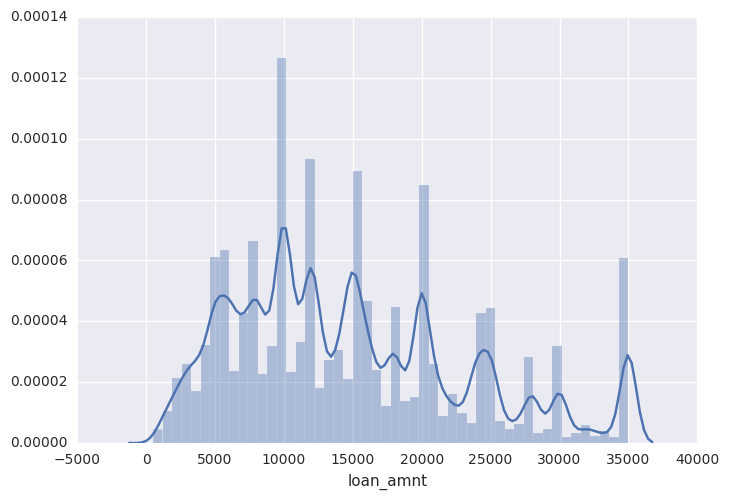

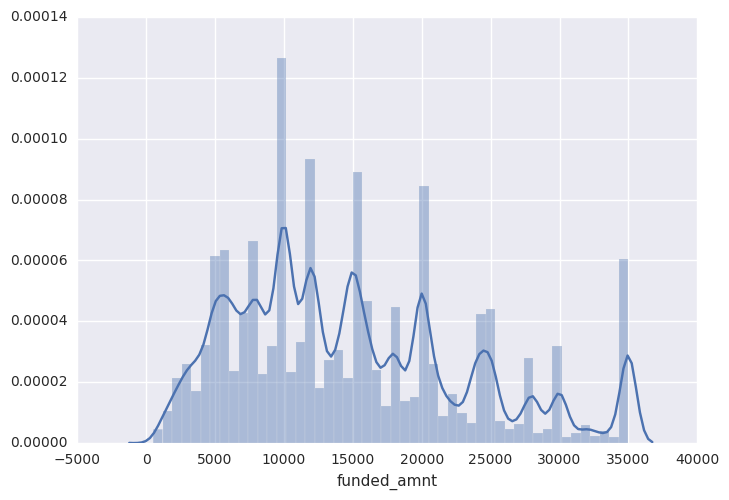

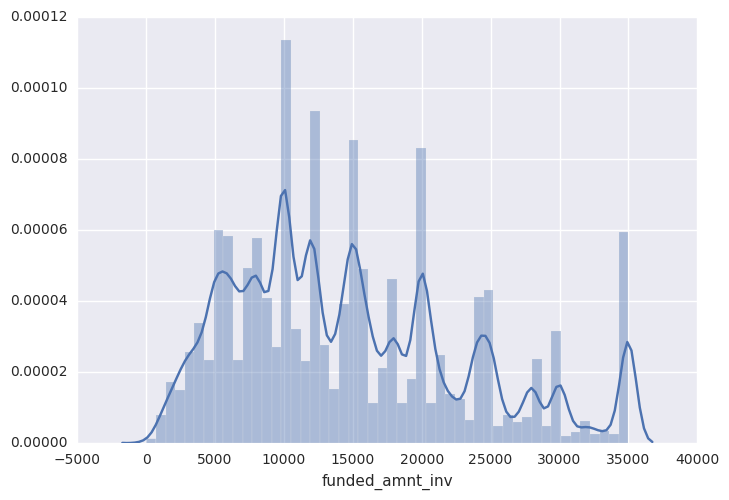

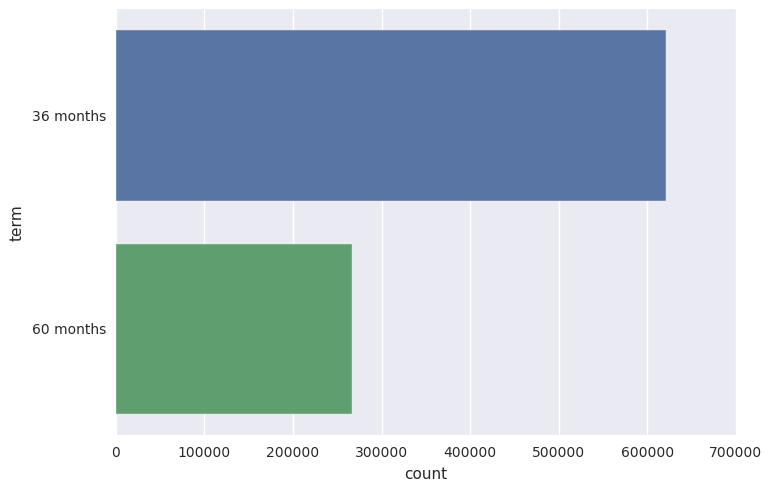

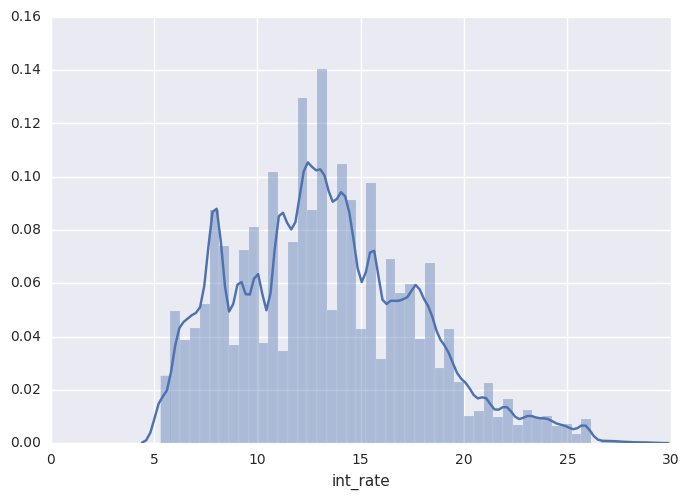

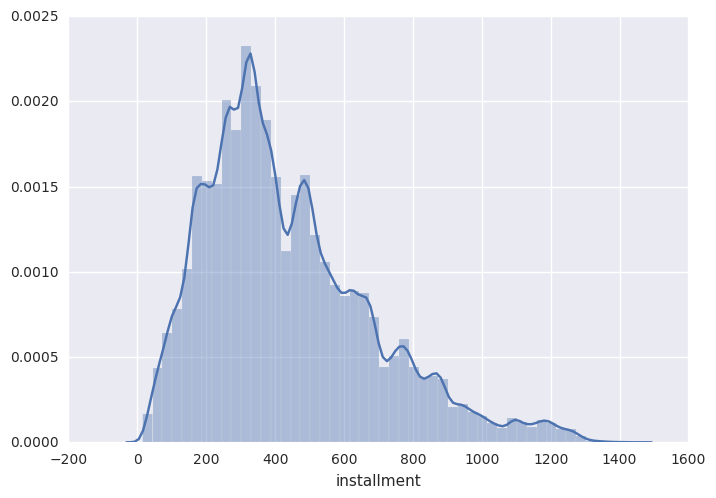

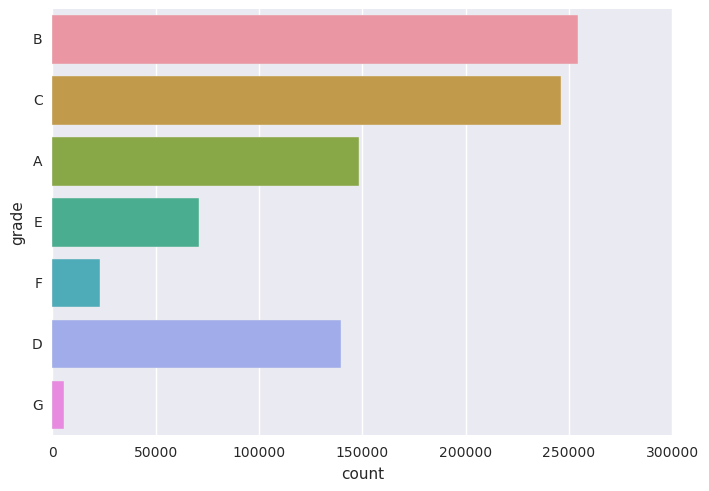

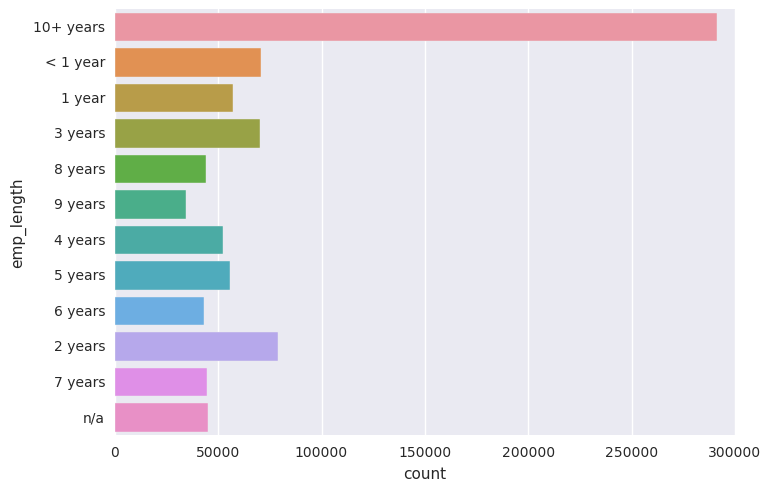

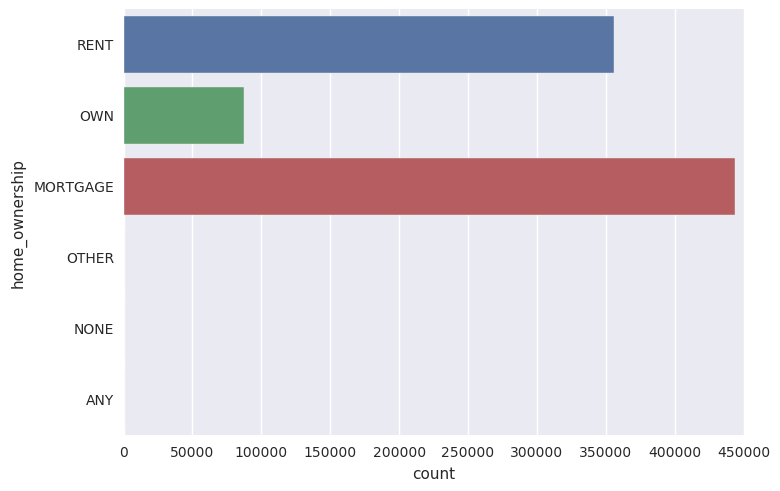

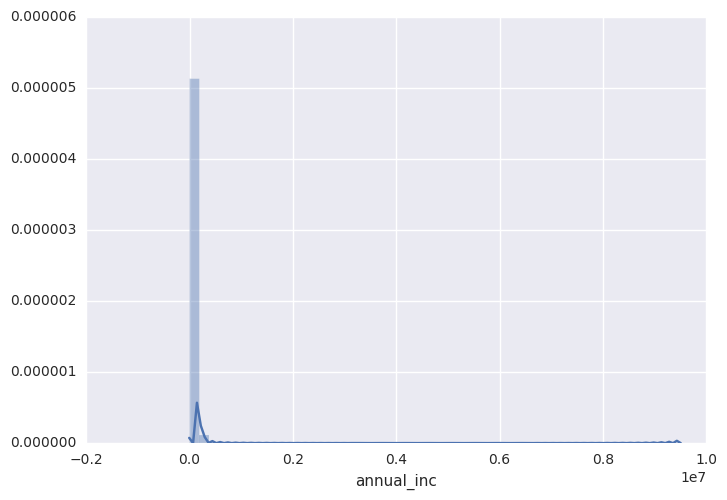

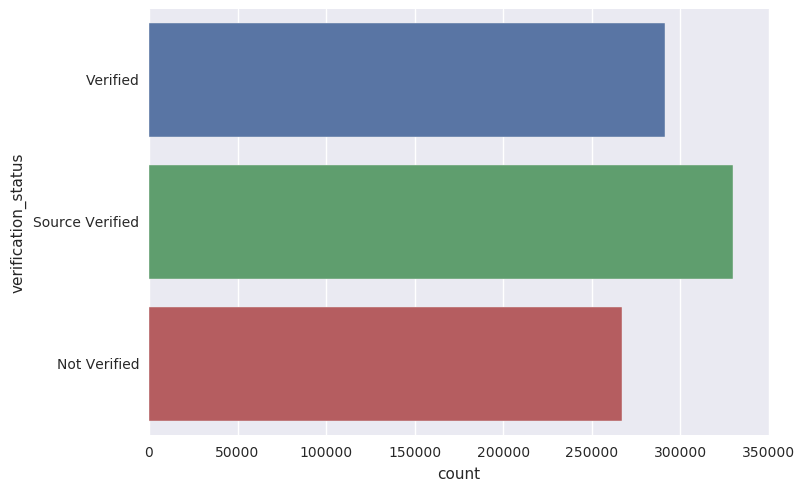

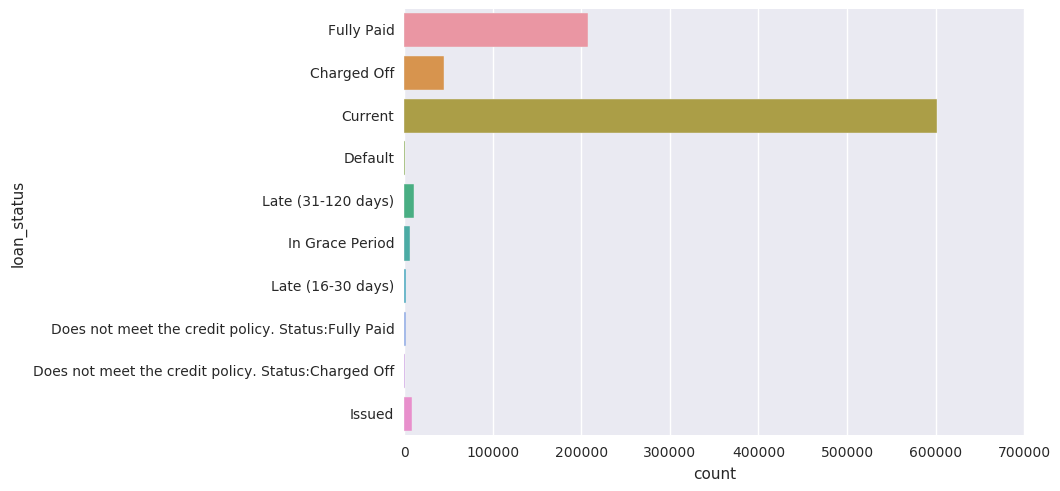

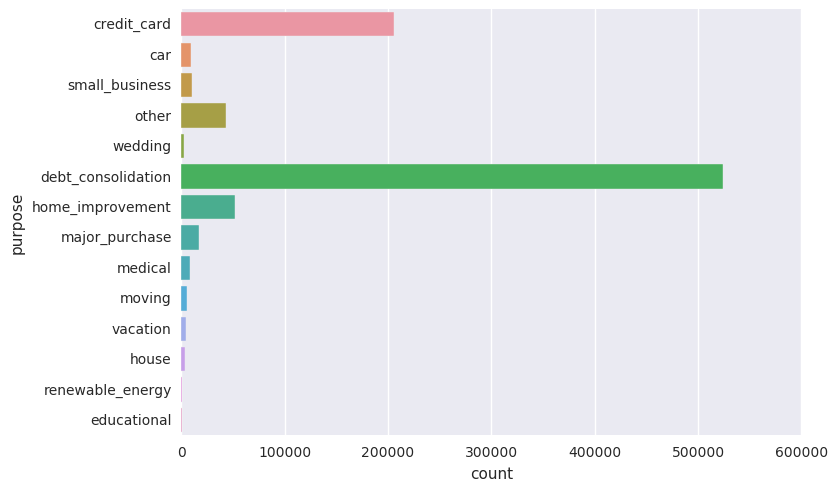

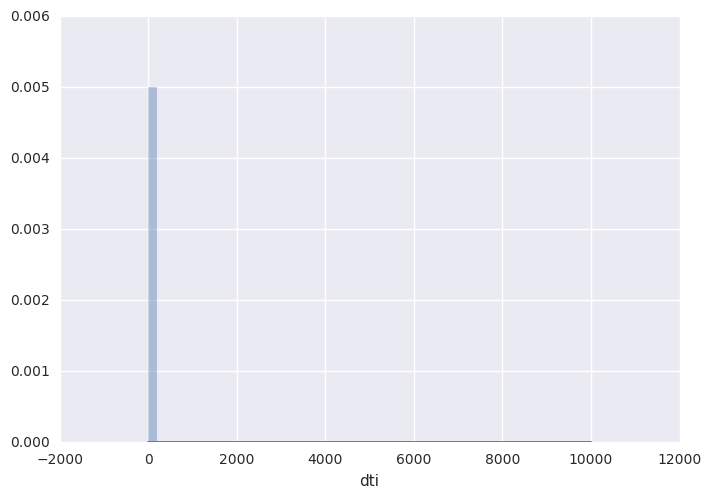

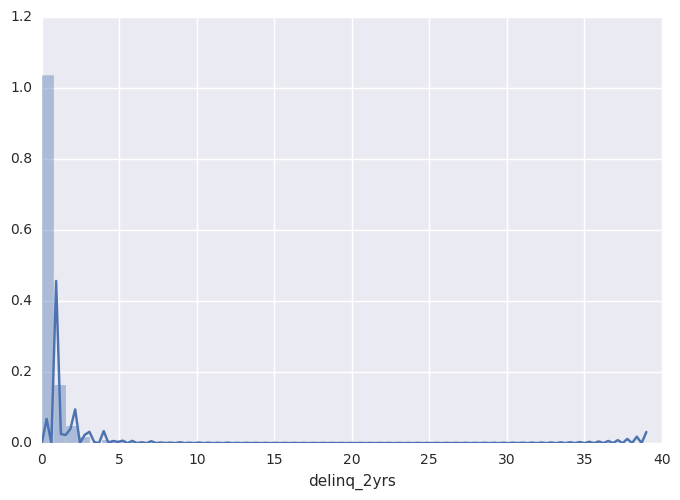

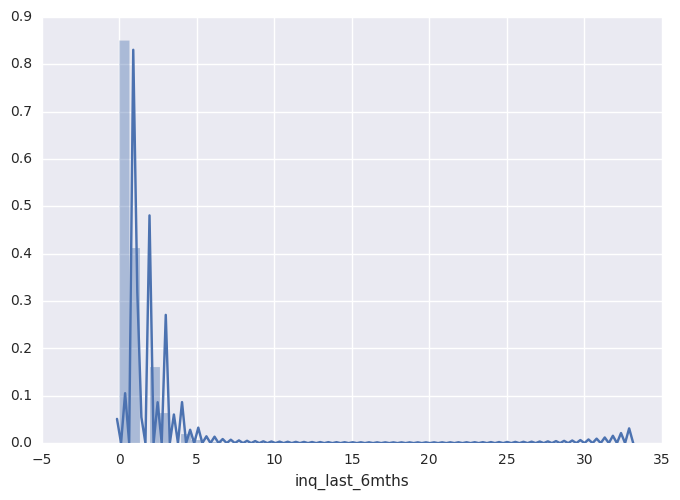

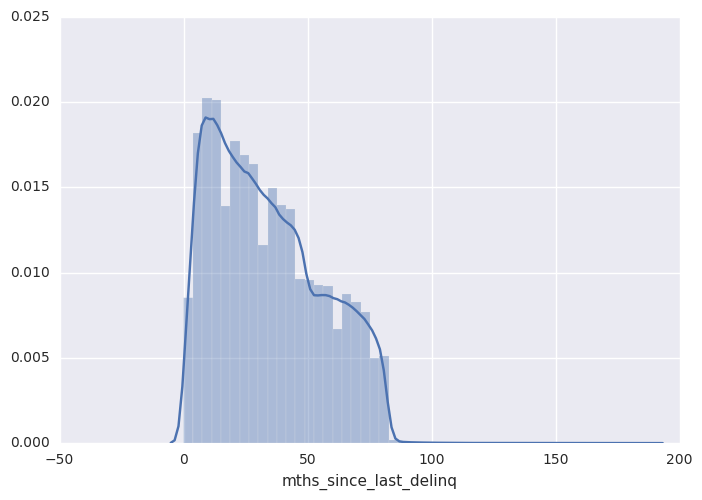

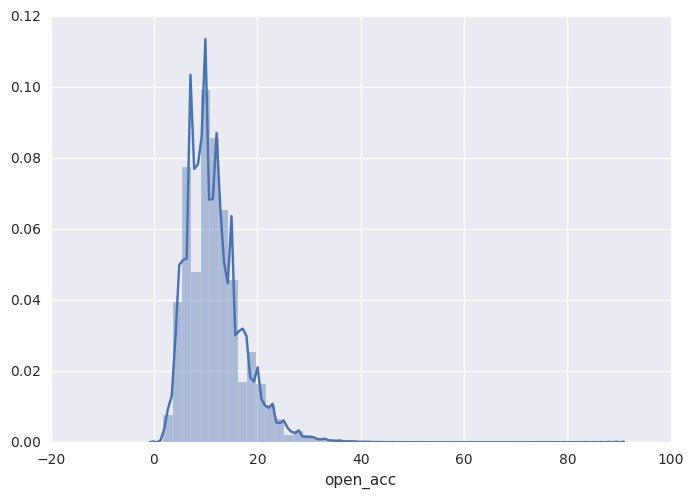

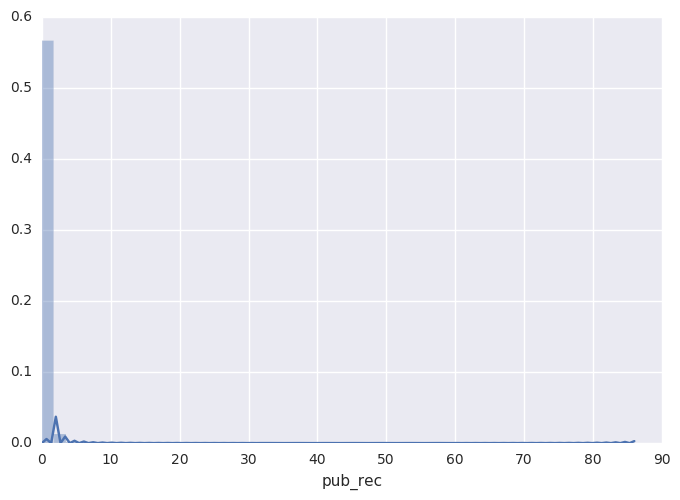

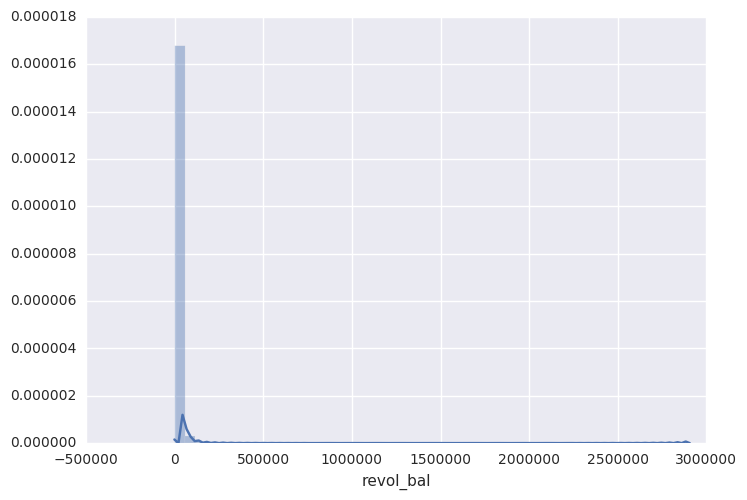

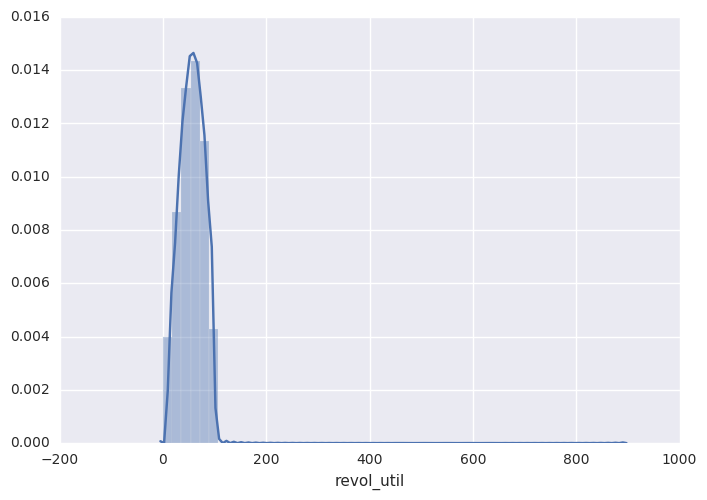

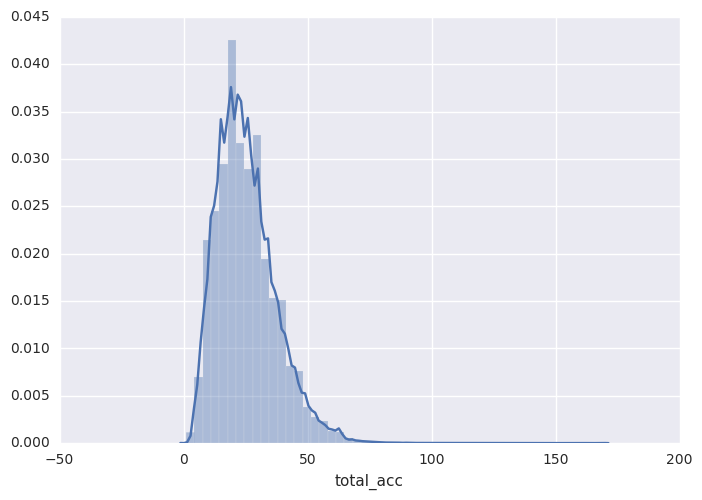

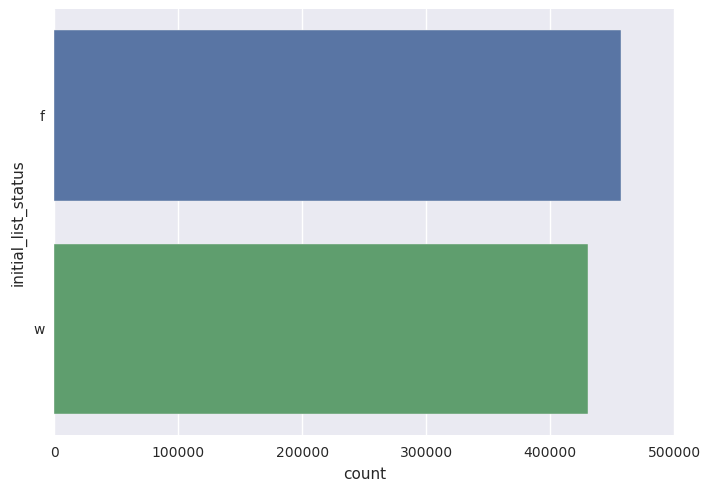

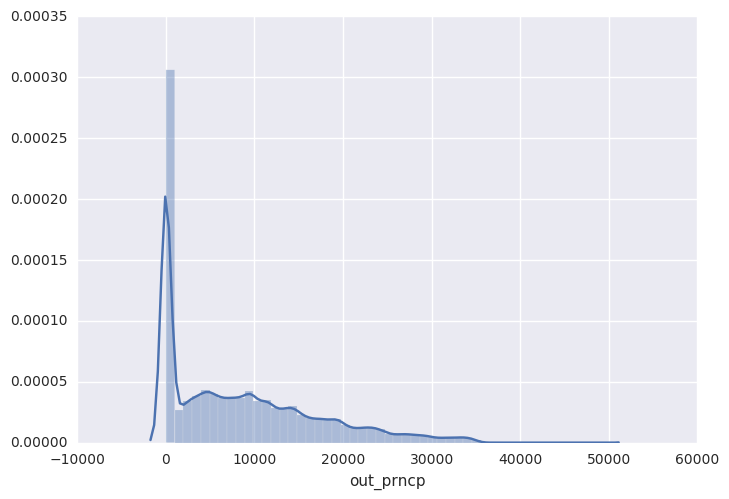

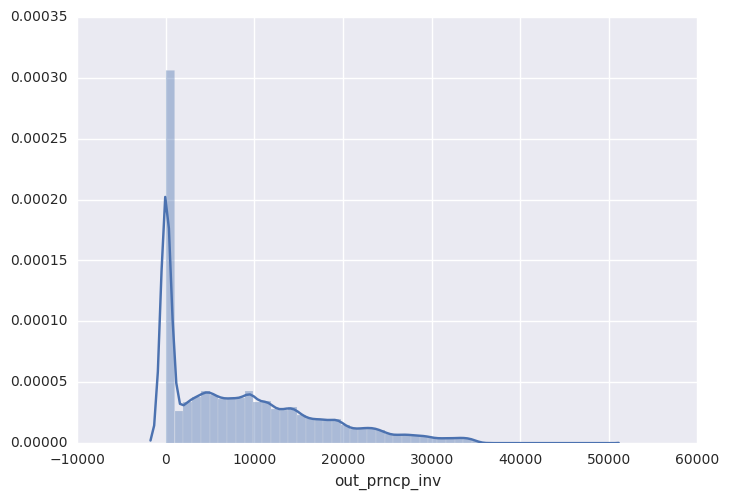

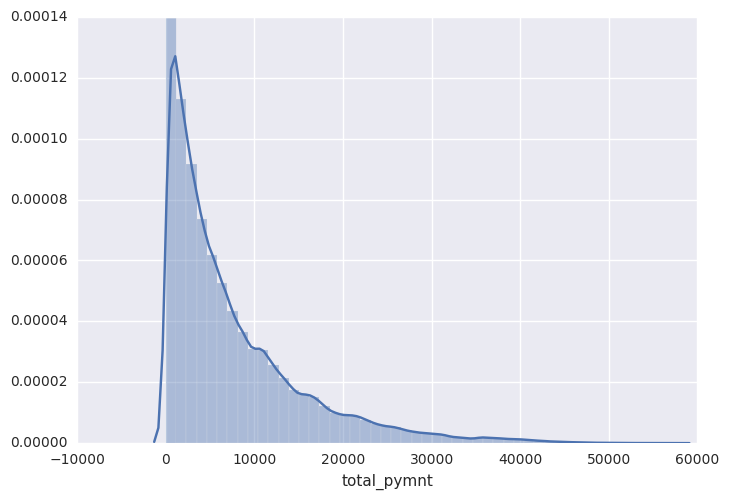

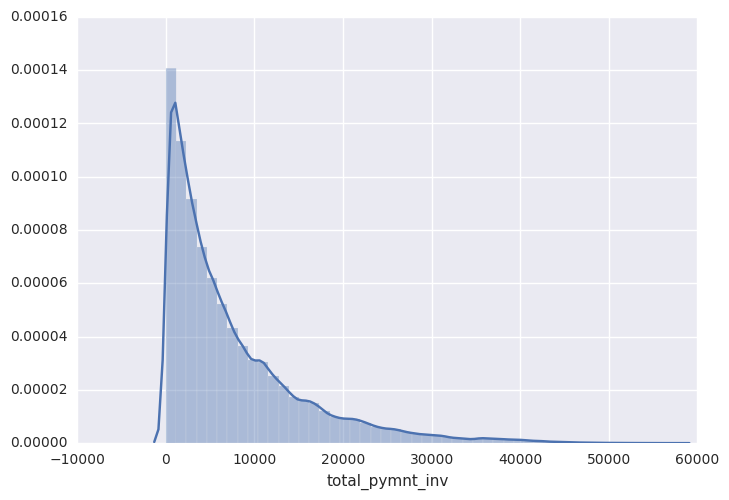

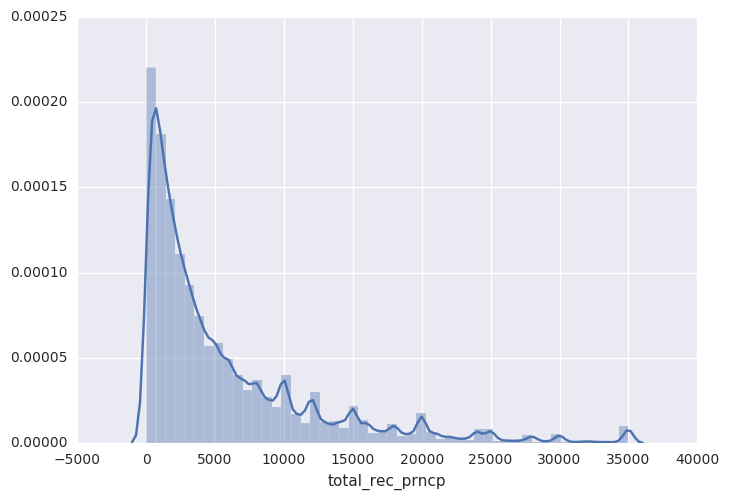

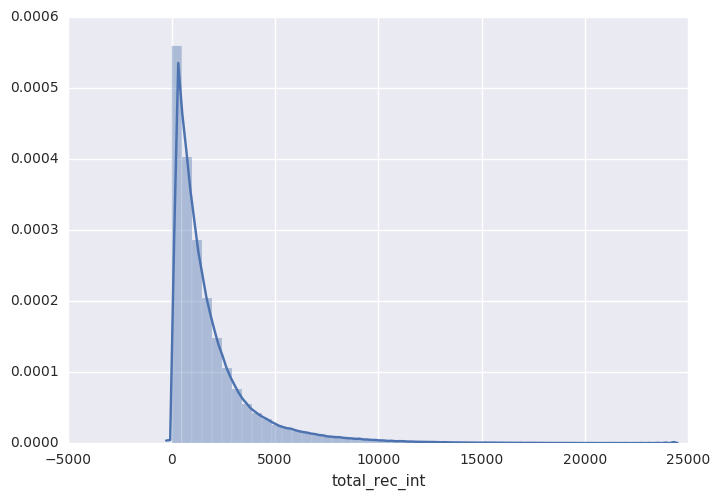

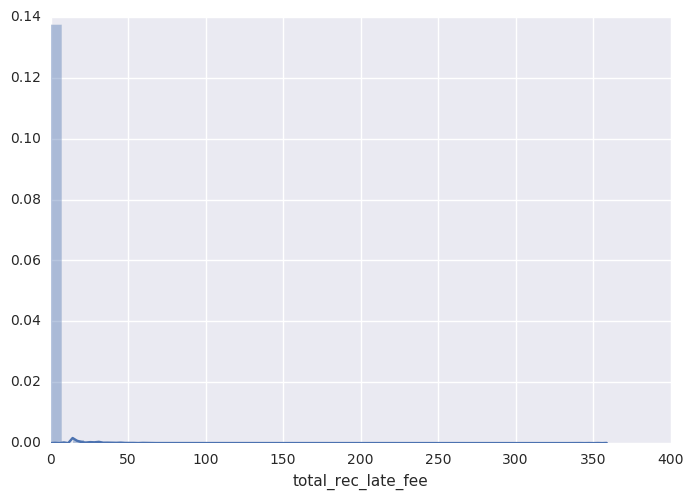

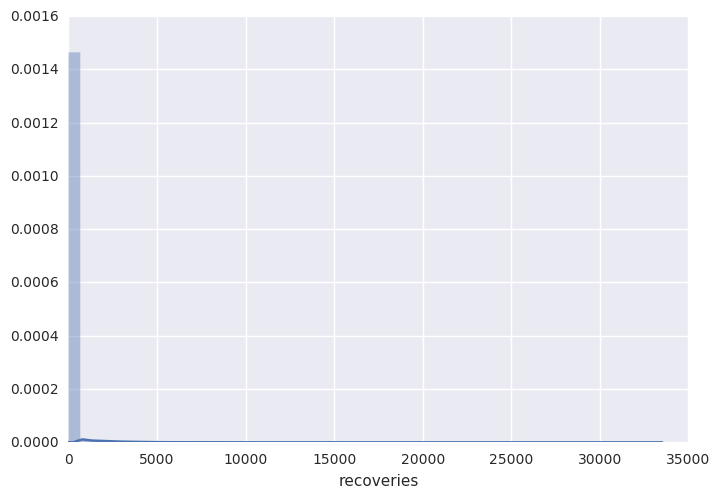

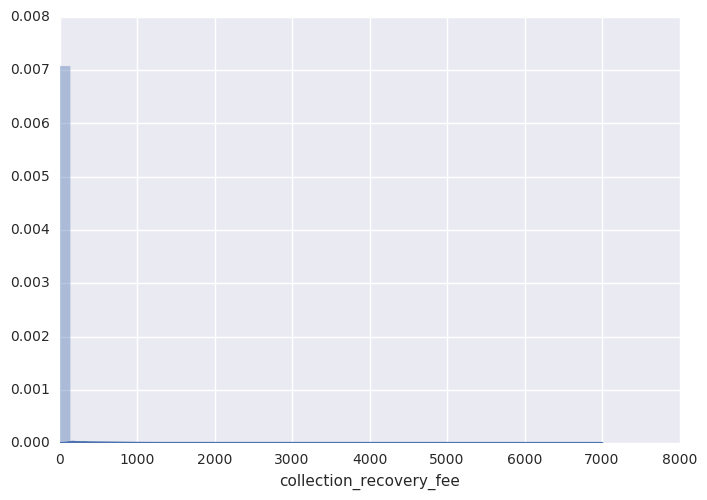

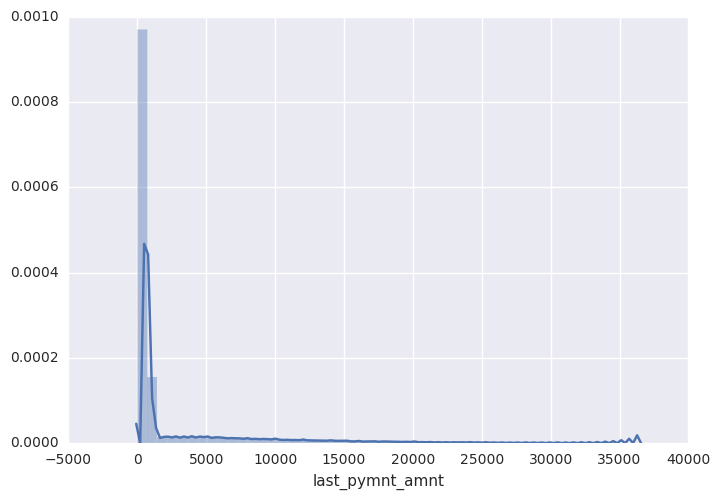

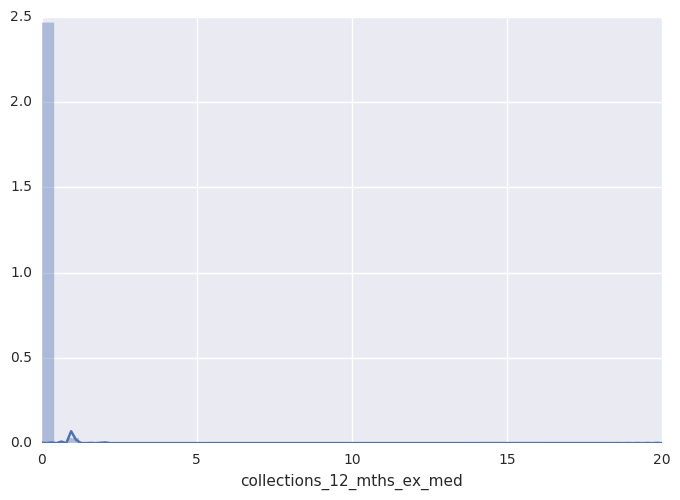

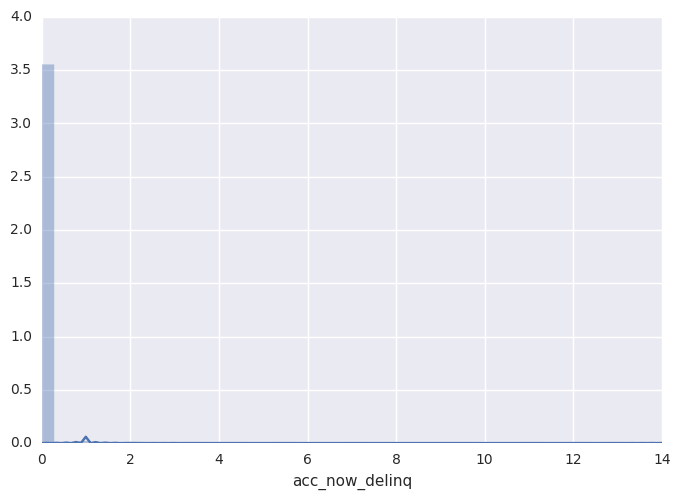

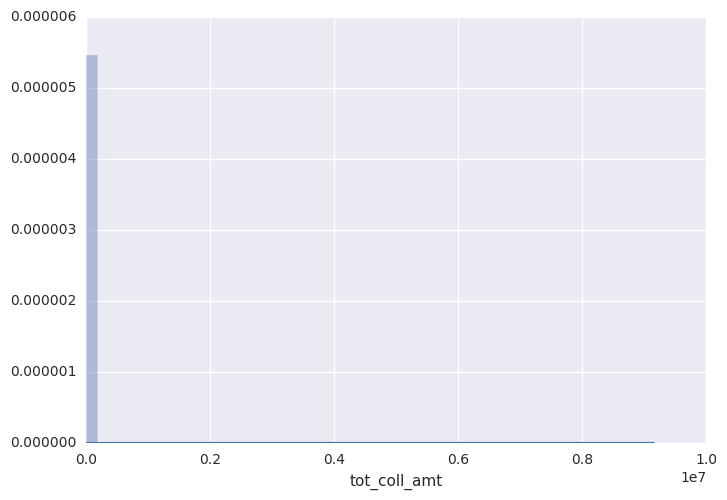

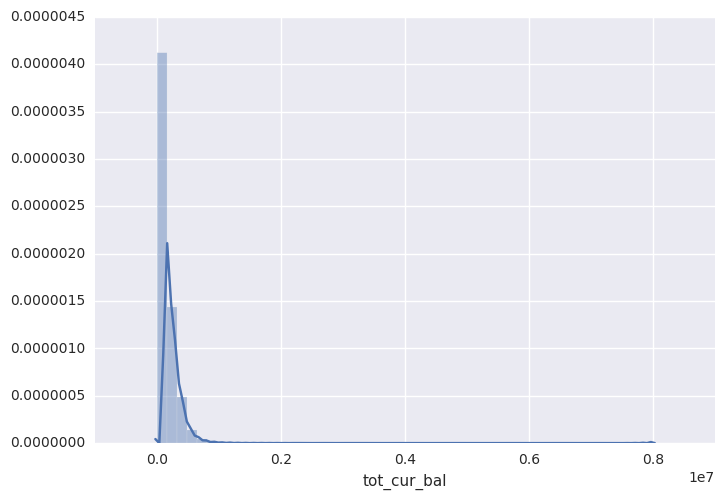

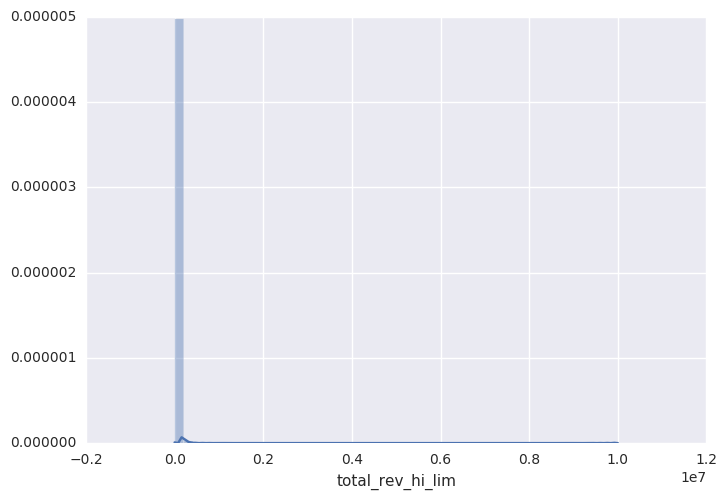

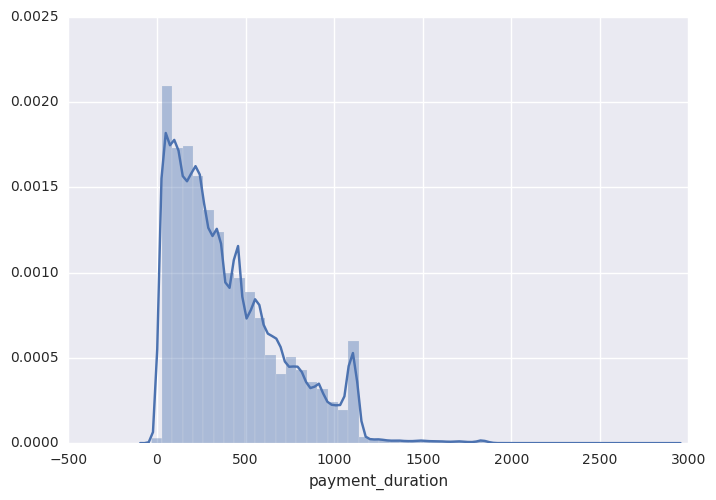

In [16]:
for col in new_df.columns:
    if new_df[col].dtype == np.object:
        sns.countplot(y=col, data=new_df)
    else:
        sns.distplot(new_df[col].dropna())
    plt.show();

### Fill Missing values for numerical features 

In [17]:
count_nan_vals = new_df.isnull().sum(axis=0)
count_nan_vals = count_nan_vals[count_nan_vals > 0] 
count_nan_vals = count_nan_vals.sort_values(ascending=False)
count_nan_vals

mths_since_last_delinq        454312
total_rev_hi_lim               70276
tot_cur_bal                    70276
tot_coll_amt                   70276
revol_util                       502
collections_12_mths_ex_med       145
acc_now_delinq                    29
total_acc                         29
pub_rec                           29
open_acc                          29
inq_last_6mths                    29
delinq_2yrs                       29
annual_inc                         4
dtype: int64

<b>Here are reasons how missing values are filled up:</b> 

mths_since_last_delinq: since most loan will be paid off, fill missing values with 0

total_rev_hi_lim: Probably not everyone has Total revolving high credit/credit limit, fill missing values with 0

tot_cur_bal: Total current balance of all accounts, missing values shoould be filled with 0

tot_coll_amt: Total collection amounts ever owed, missing values shoould be filled with 0

For the remaining numerical features that have missing values, fill with median since the number of missing values is low.

In [18]:
for col_fill_0 in count_nan_vals.index[:4]:
    new_df[col_fill_0] = new_df[col_fill_0].fillna(0)
    
for col_fill_median in count_nan_vals.index[4:]:
    new_df[col_fill_median] = new_df[col_fill_median].fillna(new_df[col_fill_median].median())

In [19]:
new_df.isnull().sum(axis=0)

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
loan_status                   0
purpose                       0
dti                           0
delinq_2yrs                   0
inq_last_6mths                0
mths_since_last_delinq        0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_rec_int                 0
total_rec_late_fee            0
recoveries                    0
collecti

### Categorical Feature transformations

In [20]:
new_df.head()

new_df.describe(include=[np.object]).T # summary categorical features only

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,payment_duration
0,5000.00,5000.00,4975.00,36 months,10.65,162.87,B,10+ years,RENT,24000.00,...,0.00,0.00,0.00,171.62,0.00,0.00,0.00,0.00,0.00,1127
1,2500.00,2500.00,2500.00,60 months,15.27,59.83,C,< 1 year,RENT,30000.00,...,0.00,117.08,1.11,119.66,0.00,0.00,0.00,0.00,0.00,487
2,2400.00,2400.00,2400.00,36 months,15.96,84.33,C,10+ years,RENT,12252.00,...,0.00,0.00,0.00,649.91,0.00,0.00,0.00,0.00,0.00,913
3,10000.00,10000.00,10000.00,36 months,13.49,339.31,C,10+ years,RENT,49200.00,...,16.97,0.00,0.00,357.48,0.00,0.00,0.00,0.00,0.00,1127
4,3000.00,3000.00,3000.00,60 months,12.69,67.79,B,1 year,RENT,80000.00,...,0.00,0.00,0.00,67.79,0.00,0.00,0.00,0.00,0.00,1492


,count,unique,top,freq
term,887379,2,36 months,621125
grade,887379,7,B,254535
emp_length,887379,12,10+ years,291569
home_ownership,887379,6,MORTGAGE,443557
verification_status,887379,3,Source Verified,329558
loan_status,887379,10,Current,601779
purpose,887379,14,debt_consolidation,524215
initial_list_status,887379,2,f,456848


In [21]:
new_df["term"].unique()

new_df['term'] = new_df['term'].str.split().str[0]
new_df['term'].head()

array(['36 months', '60 months'], dtype=object)

0    36
1    60
2    36
3    36
4    60
Name: term, dtype: object

In [22]:
new_df["emp_length"].unique()
new_df["emp_length"].value_counts().sort_values()
new_df["emp_length"].value_counts().sum()

new_df["emp_length"] = new_df["emp_length"].str.extract(r"(\d+)").astype(float) 
new_df["emp_length"].isnull().sum() # number of value "n/a" 
new_df["emp_length"] = new_df["emp_length"].fillna(new_df.emp_length.median())

new_df["emp_length"].unique()
new_df["emp_length"].value_counts().sort_values()
new_df["emp_length"].value_counts().sum()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', 'n/a'], dtype=object)

9 years       34657
6 years       42950
8 years       43955
7 years       44594
n/a           44825
4 years       52529
5 years       55704
1 year        57095
3 years       70026
< 1 year      70605
2 years       78870
10+ years    291569
Name: emp_length, dtype: int64

887379

/home/nbuser/anaconda3_23/lib/python3.4/site-packages/IPython/kernel/__main__.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)


44825

array([ 10.,   1.,   3.,   8.,   9.,   4.,   5.,   6.,   2.,   7.])

9.00      34657
8.00      43955
7.00      44594
4.00      52529
5.00      55704
3.00      70026
2.00      78870
6.00      87775
1.00     127700
10.00    291569
Name: emp_length, dtype: int64

887379

In [23]:
new_df["home_ownership"].unique()
new_df["home_ownership"].value_counts()
new_df["home_ownership"].value_counts().sum()

def convert_home_ownership(val):
    if val in ['RENT', 'MORTGAGE', 'OTHER']:
        return val
    elif val in ['OWN']:
        return 'MORTGAGE' # treat 'OWN' as "MORTGAGE"
    else:
        return 'OTHER' # treat 'NONE' and 'ANY' as 'OTHER'
    
new_df["home_ownership"] = new_df["home_ownership"].map(convert_home_ownership)

new_df["home_ownership"].unique()
new_df["home_ownership"].value_counts()
new_df["home_ownership"].value_counts().sum()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE', 'ANY'], dtype=object)

MORTGAGE    443557
RENT        356117
OWN          87470
OTHER          182
NONE            50
ANY              3
Name: home_ownership, dtype: int64

887379

array(['RENT', 'MORTGAGE', 'OTHER'], dtype=object)

MORTGAGE    531027
RENT        356117
OTHER          235
Name: home_ownership, dtype: int64

887379

In [24]:
# No change
new_df["verification_status"].unique()
new_df["verification_status"].value_counts()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

Source Verified    329558
Verified           291071
Not Verified       266750
Name: verification_status, dtype: int64

In [25]:
# categorize loan_status as 'Current' and 'Default' 
all_unique_vals = new_df["loan_status"].unique()
new_df["loan_status"].value_counts()
new_df["loan_status"].value_counts().sum()

current = ['Fully Paid', 'In Grace Period', 'Does not meet the credit policy. Status:Fully Paid', 'Issued']
def convert_loan_status(val):
    if val in ['Current', 'Default']:
        return val
    elif val in current:
        return 'Current'
    else:
        return 'Default'

new_df["loan_status"] = new_df["loan_status"].map(convert_loan_status)         

new_df["loan_status"].unique()
new_df["loan_status"].value_counts()
new_df["loan_status"].value_counts().sum()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

887379

array(['Current', 'Default'], dtype=object)

Current    826203
Default     61176
Name: loan_status, dtype: int64

887379

In [26]:
new_df.purpose.unique()
new_df.purpose.value_counts()
new_df.purpose.value_counts().sum()

# The top two purposes are debt_consolidation and credit_card
# treat house  as home_improvement
# treat all other purposes as other
def convert_purpose(val):
    if val in ['debt_consolidation', 'credit_card', 'home_improvement', 'other']:
        return val
    elif val == 'house':
        return 'home_improvement'
    else:
        return 'other'
    
new_df["purpose"] = new_df["purpose"].map(convert_purpose)   

new_df.purpose.unique()
new_df.purpose.value_counts()
new_df.purpose.value_counts().sum()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

debt_consolidation    524215
credit_card           206182
home_improvement       51829
other                  42894
major_purchase         17277
small_business         10377
car                     8863
medical                 8540
moving                  5414
vacation                4736
house                   3707
wedding                 2347
renewable_energy         575
educational              423
Name: purpose, dtype: int64

887379

array(['credit_card', 'other', 'debt_consolidation', 'home_improvement'], dtype=object)

debt_consolidation    524215
credit_card           206182
other                 101446
home_improvement       55536
Name: purpose, dtype: int64

887379

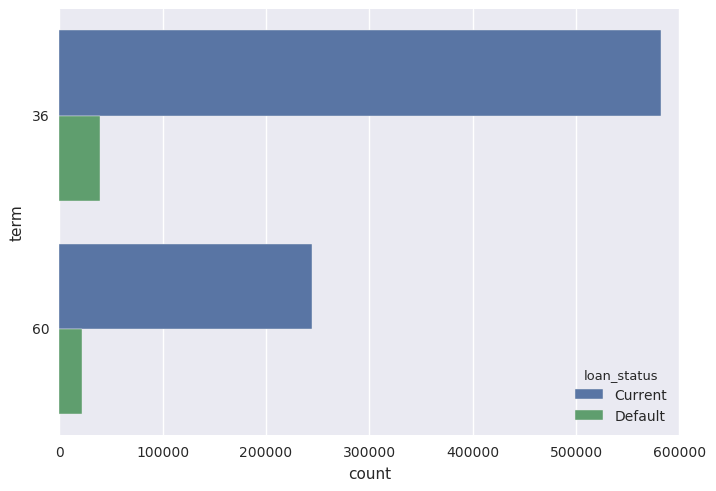

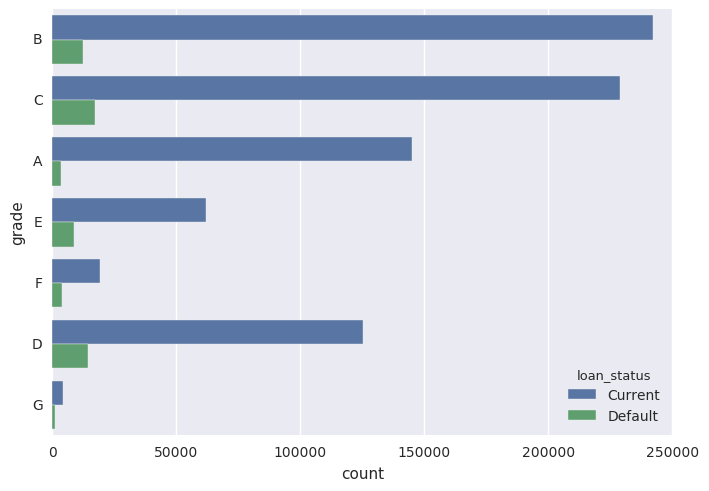

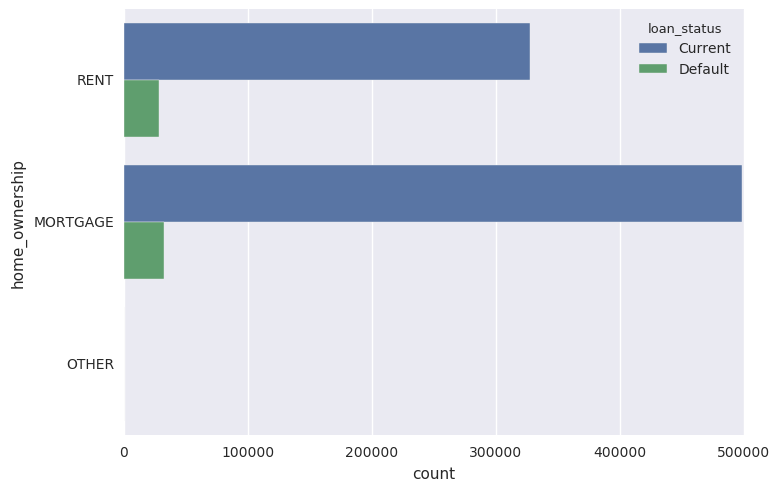

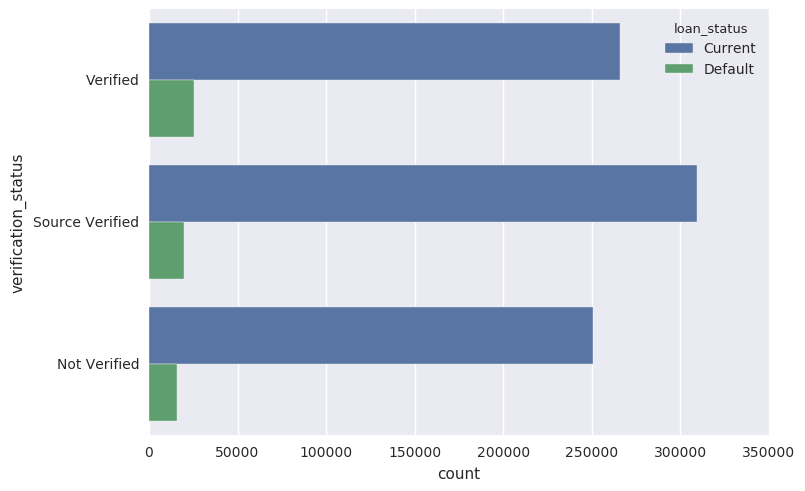

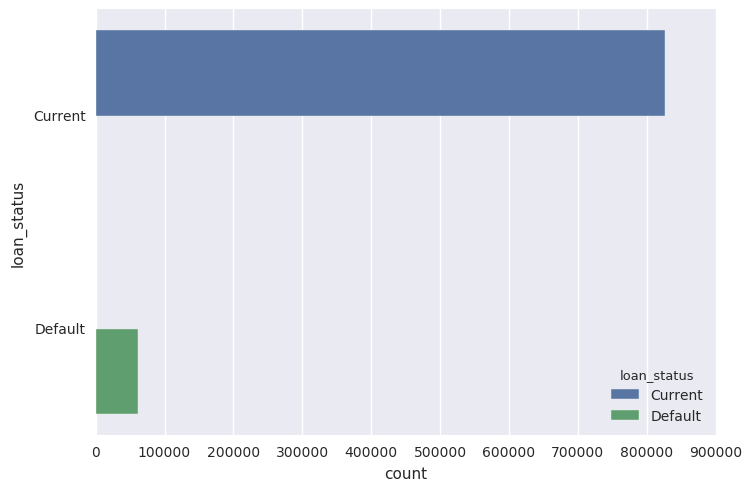

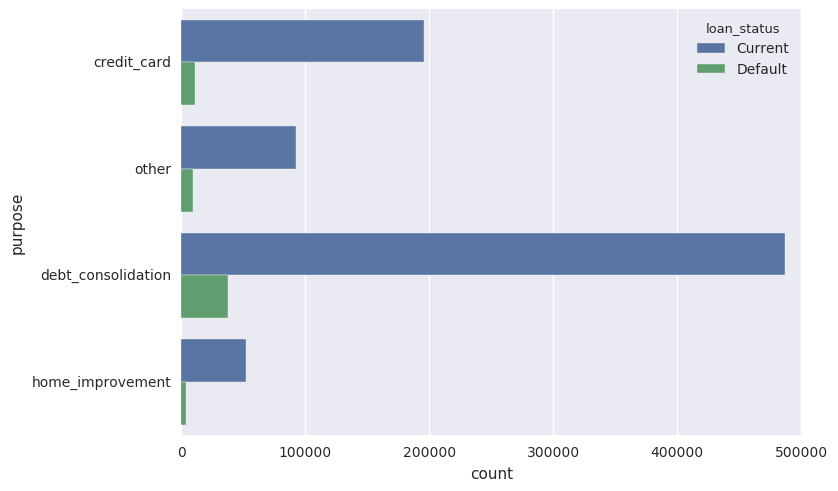

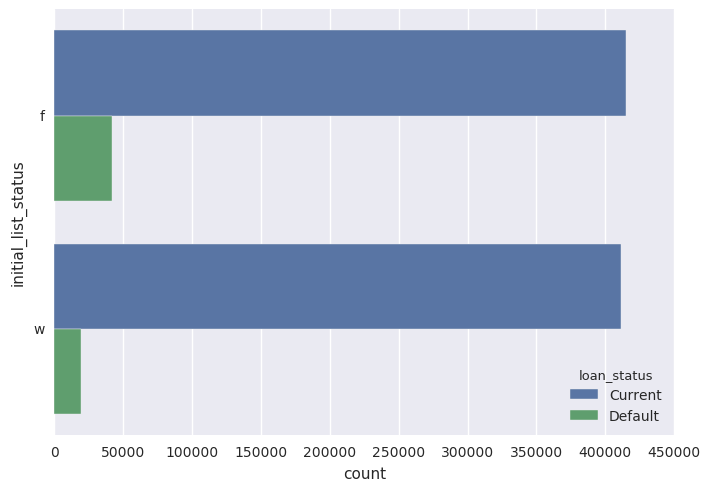

In [27]:
for col in new_df.columns:
    if new_df[col].dtype == np.object:
        sns.countplot(y=col, hue="loan_status", data=new_df)
        plt.show();

### Categorical Feature Encoding

In [28]:
new_df.shape 

# split data into features and label
new_df_X = new_df.drop("loan_status", axis=1)
new_df_X.shape

new_df_y = new_df["loan_status"]
new_df_y.shape

(887379, 39)

(887379, 38)

(887379,)

In [29]:
## LabelEncoder
new_df_X_LabelEncoder = new_df_X.apply(LabelEncoder().fit_transform)
new_df_X_LabelEncoder.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,payment_duration
0,171,171,2144,0,101,8998,1,9,2,3219,...,0,0,0,13289,0,0,0,0,0,167
1,71,71,1055,1,275,1643,2,0,2,5758,...,0,1684,220,8938,0,0,0,0,0,67
2,67,67,1013,0,299,3234,2,9,2,426,...,0,0,0,54907,0,0,0,0,0,134
3,371,371,4735,0,197,23752,2,9,2,17260,...,1700,0,0,30155,0,0,0,0,0,167
4,91,91,1245,1,166,2147,1,0,2,33858,...,0,0,0,4830,0,0,0,0,0,210


In [30]:
new_df_X_LabelEncoder.shape
new_df_X_LabelEncoder.columns

(887379, 38)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'purpose', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'payment_duration'],
      dtype='object')

In [31]:
# show all categorical features
[x for x in new_df_X.columns if new_df_X[x].dtype == np.object]

['term',
 'grade',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status']

In [32]:
# dummies Encoder
#cat_features = [col for col in new_df_X.columns if new_df_X[col].dtype == np.object]
new_df_X_dummies_Encoder = pd.get_dummies(new_df_X)
#new_df_X.apply(OneHotEncoder(categorical_features=cat_features).fit_transform)
new_df_X_dummies_Encoder.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_credit_card,purpose_debt_consolidation,purpose_home_improvement,purpose_other,initial_list_status_f,initial_list_status_w
0,5000.00,5000.00,4975.00,10.65,162.87,10.00,24000.00,27.65,0.00,1.00,...,1,0,0,1,1,0,0,0,1,0
1,2500.00,2500.00,2500.00,15.27,59.83,1.00,30000.00,1.00,0.00,5.00,...,1,0,1,0,0,0,0,1,1,0
2,2400.00,2400.00,2400.00,15.96,84.33,10.00,12252.00,8.72,0.00,2.00,...,1,1,0,0,0,0,0,1,1,0
3,10000.00,10000.00,10000.00,13.49,339.31,10.00,49200.00,20.00,0.00,1.00,...,1,0,1,0,0,0,0,1,1,0
4,3000.00,3000.00,3000.00,12.69,67.79,1.00,80000.00,17.94,0.00,0.00,...,1,0,1,0,0,0,0,1,1,0


In [33]:
new_df_X_dummies_Encoder.shape
new_df_X_dummies_Encoder.columns

(887379, 53)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'payment_duration',
       'term_36', 'term_60', 'grade_A', 'grade_B', 'grade_C', 'grade_D',
       'grade_E', 'grade_F', 'grade_G', 'home_ownership_MORTGAGE',
       'home_ownership_OTHER', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'p

In [34]:
new_df_X.shape # 38 columns in total 

cat_features = [col for col in new_df_X.columns if new_df_X[col].dtype == np.object]
summary_cat = new_df_X[cat_features].describe()

summary_cat.T
summary_cat.T.shape # 6 categorical columns
summary_cat.T.unique.sum() # 21 unique categorical values; 

# 38 + 21 - 6 = 53; This matches the number of columns in new_df_X_dummies_Encoder  

(887379, 38)

,count,unique,top,freq
term,887379,2,36,621125
grade,887379,7,B,254535
home_ownership,887379,3,MORTGAGE,531027
verification_status,887379,3,Source Verified,329558
purpose,887379,4,debt_consolidation,524215
initial_list_status,887379,2,f,456848


(6, 4)

21

### Features Correlation

In [35]:
corr_matrix = new_df_X_LabelEncoder.corr()
corr_matrix

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,payment_duration
loan_amnt,1.00,1.00,0.96,0.41,0.15,0.95,0.15,0.10,-0.18,0.52,...,0.03,0.06,0.04,0.34,-0.02,0.00,-0.03,0.35,0.45,-0.05
funded_amnt,1.00,1.00,0.96,0.41,0.15,0.95,0.15,0.10,-0.18,0.52,...,0.03,0.06,0.04,0.34,-0.02,0.00,-0.03,0.35,0.45,-0.05
funded_amnt_inv,0.96,0.96,1.00,0.44,0.12,0.94,0.12,0.11,-0.18,0.50,...,0.02,0.05,0.04,0.34,-0.02,0.00,-0.03,0.33,0.44,-0.05
term,0.41,0.41,0.44,1.00,0.43,0.18,0.44,0.07,-0.10,0.14,...,0.01,0.05,0.04,0.05,-0.01,0.01,-0.01,0.14,0.12,-0.04
int_rate,0.15,0.15,0.12,0.43,1.00,0.13,0.95,0.01,0.06,-0.11,...,0.06,0.13,0.11,0.10,0.01,0.03,0.01,-0.07,-0.19,0.08
installment,0.95,0.95,0.94,0.18,0.13,1.00,0.13,0.09,-0.16,0.50,...,0.04,0.06,0.05,0.37,-0.01,0.01,-0.03,0.31,0.41,-0.03
grade,0.15,0.15,0.12,0.44,0.95,0.13,1.00,0.00,0.06,-0.10,...,0.06,0.10,0.09,0.05,0.02,0.03,0.02,-0.07,-0.18,-0.03
emp_length,0.10,0.10,0.11,0.07,0.01,0.09,0.00,1.00,-0.20,0.13,...,-0.01,-0.00,-0.00,0.04,-0.00,0.01,0.01,0.13,0.12,-0.01
home_ownership,-0.18,-0.18,-0.18,-0.10,0.06,-0.16,0.06,-0.20,1.00,-0.24,...,0.00,0.01,0.01,-0.08,0.01,-0.02,-0.01,-0.51,-0.21,0.01
annual_inc,0.52,0.52,0.50,0.14,-0.11,0.50,-0.10,0.13,-0.24,1.00,...,0.02,0.00,-0.01,0.22,-0.00,0.02,-0.00,0.50,0.40,-0.04


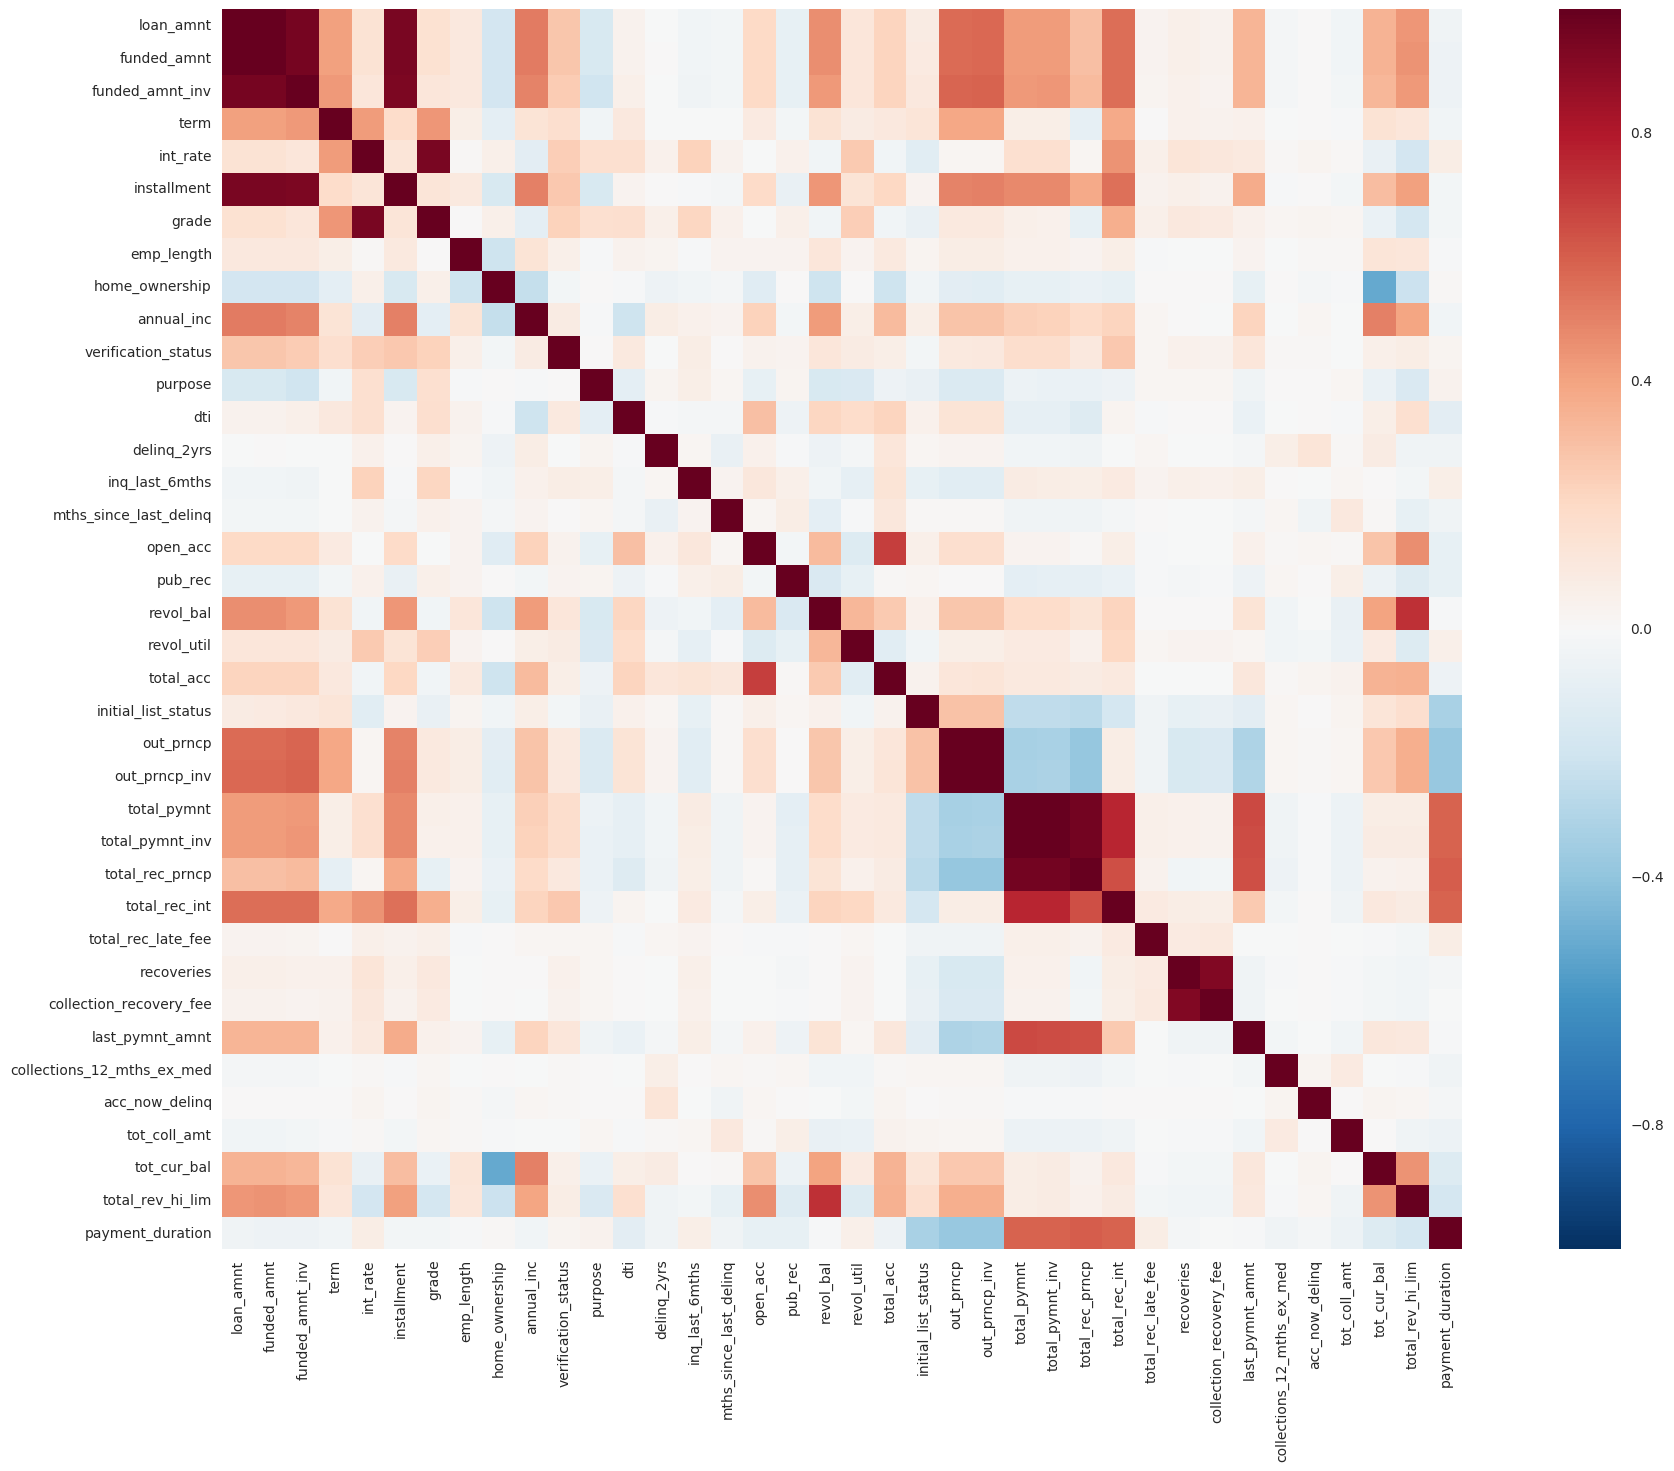

In [36]:
f, ax = plt.subplots(figsize=(25, 16))
sns.heatmap(corr_matrix, square=True)
plt.show();

### Features Selection

In [37]:
# Univariate feature selection -- SelectKBest
sel_10_best = SelectKBest(score_func=chi2, k=10)
sel_10_best.fit(new_df_X_LabelEncoder, new_df_y)
sel_10_best.scores_
indices_selected = sel_10_best.get_support(indices=True)
new_df_X_LabelEncoder_sel_10_best = new_df_X_LabelEncoder[indices_selected]
new_df_X_LabelEncoder_sel_10_best.head()

SelectKBest(k=10, score_func=<function chi2 at 0x7f2e045a9d08>)

array([  3.646e+01,   2.734e+02,   3.313e+04,   8.738e+02,   2.516e+06,
         7.790e+05,   1.758e+04,   5.124e+02,   1.466e+03,   2.094e+07,
         9.618e+02,   1.101e+03,   1.105e+05,   9.851e+00,   8.593e+03,
         3.268e+03,   6.868e+02,   3.497e+02,   6.472e+06,   1.990e+05,
         1.891e+03,   3.891e+03,   2.689e+09,   2.817e+09,   3.406e+07,
         3.709e+07,   2.583e+08,   3.422e+08,   9.000e+07,   3.713e+09,
         2.984e+09,   5.325e+08,   6.416e+01,   7.599e-05,   8.637e+05,
         3.369e+08,   2.310e+07,   2.766e+01])

,out_prncp,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,tot_cur_bal
0,0,0,211682,165102,77356,0,0,0,13289,0
1,0,0,40722,18620,39169,0,1684,220,8938,0
2,0,0,121031,98335,54545,0,0,0,54907,0
3,0,0,350814,224947,177998,1700,0,0,30155,0
4,6985,7035,129856,92560,90064,0,0,0,4830,0


In [38]:
new_df_X_LabelEncoder_sel_10_best.shape

(887379, 10)

In [39]:
# SelectFromModel -- LogisticRegression
sel_model_logreg = SelectFromModel(estimator=LogisticRegression())
sel_model_logreg.fit(new_df_X_LabelEncoder, new_df_y)

SelectFromModel(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
        prefit=False, threshold=None)

In [40]:
indices_sel_model_logreg = sel_model_logreg.get_support(indices=True)
indices_sel_model_logreg
                                              
new_df_X_LabelEncoder_sel_model_logreg = new_df_X_LabelEncoder[indices_sel_model_logreg]
new_df_X_LabelEncoder_sel_model_logreg.head()
new_df_X_LabelEncoder_sel_model_logreg.shape

array([ 0,  1,  4, 15, 28, 29, 30, 37])

,loan_amnt,funded_amnt,int_rate,mths_since_last_delinq,total_rec_late_fee,recoveries,collection_recovery_fee,payment_duration
0,171,171,101,0,0,0,0,167
1,71,71,275,0,0,1684,220,67
2,67,67,299,0,0,0,0,134
3,371,371,197,35,1700,0,0,167
4,91,91,166,38,0,0,0,210


(887379, 8)

In [41]:
# SelectFromModel -- RandomForestClassifier
sel_model_randforest = SelectFromModel(estimator=RandomForestClassifier())
sel_model_randforest.fit(new_df_X_LabelEncoder, new_df_y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
        prefit=False, threshold=None)

In [42]:
indices_sel_model_randforest = sel_model_randforest.get_support(indices=True)
indices_sel_model_randforest
                                              
new_df_X_LabelEncoder_sel_model_randforest = new_df_X_LabelEncoder[indices_sel_model_randforest]
new_df_X_LabelEncoder_sel_model_randforest.head()
new_df_X_LabelEncoder_sel_model_randforest.shape

array([ 0,  5, 22, 23, 24, 25, 26, 27, 29, 30, 31, 37])

,loan_amnt,installment,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,recoveries,collection_recovery_fee,last_pymnt_amnt,payment_duration
0,171,8998,0,0,207007,211682,165102,77356,0,0,13289,167
1,71,1643,0,0,38705,40722,18620,39169,1684,220,8938,67
2,67,3234,0,0,116229,121031,98335,54545,0,0,54907,134
3,371,23752,0,0,347801,350814,224947,177998,0,0,30155,167
4,91,2147,6985,7035,124813,129856,92560,90064,0,0,4830,210


(887379, 12)

In [43]:
# Feature Importance -- ExtraTreesClassifier
extratrees = ExtraTreesClassifier()
extratrees.fit(new_df_X_LabelEncoder, new_df_y)

ExtraTreesClassifier(bootstrap=False, class_weight=None, criterion='gini',
           max_depth=None, max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [44]:
top_10_features_extratrees = sorted(zip(extratrees.feature_importances_, new_df_X_LabelEncoder.columns), reverse=True)[:10]
top_10_features_extratrees

top_10_features_extratrees = list(zip(*top_10_features_extratrees))[-1]
top_10_features_extratrees

#top_10_features_extratrees_indexes = [new_df_X_LabelEncoder.columns.get_loc(col) for col in top_10_features_extratrees ]
#top_10_features_extratrees_indexes

[(0.15073723509671139, 'recoveries'),
 (0.10834895102414373, 'collection_recovery_fee'),
 (0.071048240892997841, 'out_prncp'),
 (0.066849953073610829, 'out_prncp_inv'),
 (0.061000579856010394, 'total_rec_prncp'),
 (0.048015101127140317, 'loan_amnt'),
 (0.046585880312631299, 'installment'),
 (0.045925771844512679, 'funded_amnt_inv'),
 (0.040465970684788327, 'total_pymnt_inv'),
 (0.036638937693719197, 'total_pymnt')]

('recoveries',
 'collection_recovery_fee',
 'out_prncp',
 'out_prncp_inv',
 'total_rec_prncp',
 'loan_amnt',
 'installment',
 'funded_amnt_inv',
 'total_pymnt_inv',
 'total_pymnt')

In [45]:
new_df_X_LabelEncoder_extratrees = new_df_X_LabelEncoder[list(top_10_features_extratrees)]
new_df_X_LabelEncoder_extratrees.head()

,recoveries,collection_recovery_fee,out_prncp,out_prncp_inv,total_rec_prncp,loan_amnt,installment,funded_amnt_inv,total_pymnt_inv,total_pymnt
0,0,0,0,0,165102,171,8998,2144,211682,207007
1,1684,220,0,0,18620,71,1643,1055,40722,38705
2,0,0,0,0,98335,67,3234,1013,121031,116229
3,0,0,0,0,224947,371,23752,4735,350814,347801
4,0,0,6985,7035,92560,91,2147,1245,129856,124813


In [46]:
new_df_X_LabelEncoder_extratrees.shape

(887379, 10)

### compare models with different datasets

In [47]:
models = [
    ('LogReg', LogisticRegression()),
    #('DTree', DecisionTreeClassifier()),
    #('RandomForest', RandomForestClassifier()),
    #('ExtraTrees', ExtraTreesClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('GBoosting', GradientBoostingClassifier()),
    ('bayes_GNB', GaussianNB()),
    ]


datasets_X = {"X_LabelEncoder": new_df_X_LabelEncoder,
              "sel_10_best": new_df_X_LabelEncoder_sel_10_best,
              "sel_model_logreg": new_df_X_LabelEncoder_sel_model_logreg,
              "sel_model_randforest": new_df_X_LabelEncoder_sel_model_randforest,
              "extratrees": new_df_X_LabelEncoder_extratrees}
all_scores = {}
for name, model in models:
    for x_name in datasets_X:
        scores = cross_val_score(model, datasets_X.get(x_name), new_df_y, cv=3, scoring='accuracy')
        all_scores[(name, x_name)] = scores.mean() 
        print("({}, {}): {:.2f}".format(name, x_name, scores.mean()))

(LogReg, extratrees): 0.96
(LogReg, sel_model_logreg): 0.96
(LogReg, X_LabelEncoder): 0.96
(LogReg, sel_10_best): 0.96
(LogReg, sel_model_randforest): 0.96
(AdaBoost, extratrees): 0.96
(AdaBoost, sel_model_logreg): 0.82
(AdaBoost, X_LabelEncoder): 0.76
(AdaBoost, sel_10_best): 0.89
(AdaBoost, sel_model_randforest): 0.80
(GBoosting, extratrees): 0.90
(GBoosting, sel_model_logreg): 0.81
(GBoosting, X_LabelEncoder): 0.63
(GBoosting, sel_10_best): 0.87
(GBoosting, sel_model_randforest): 0.64
(bayes_GNB, extratrees): 0.96
(bayes_GNB, sel_model_logreg): 0.96
(bayes_GNB, X_LabelEncoder): 0.96
(bayes_GNB, sel_10_best): 0.96
(bayes_GNB, sel_model_randforest): 0.96


In [48]:
all_scores_2digits = {key: "{:.3f}".format(val) for key, val in sorted(all_scores.items(), key=lambda t: t[-1], reverse=True)}
all_scores_2digits = sorted(all_scores_2digits.items(), key=lambda t: t[-1], reverse=True)
all_scores_2digits

[(('LogReg', 'extratrees'), '0.964'),
 (('LogReg', 'X_LabelEncoder'), '0.962'),
 (('LogReg', 'sel_model_randforest'), '0.961'),
 (('AdaBoost', 'extratrees'), '0.960'),
 (('bayes_GNB', 'sel_model_randforest'), '0.959'),
 (('bayes_GNB', 'extratrees'), '0.959'),
 (('bayes_GNB', 'sel_model_logreg'), '0.957'),
 (('LogReg', 'sel_model_logreg'), '0.956'),
 (('bayes_GNB', 'X_LabelEncoder'), '0.956'),
 (('LogReg', 'sel_10_best'), '0.956'),
 (('bayes_GNB', 'sel_10_best'), '0.956'),
 (('GBoosting', 'extratrees'), '0.896'),
 (('AdaBoost', 'sel_10_best'), '0.889'),
 (('GBoosting', 'sel_10_best'), '0.869'),
 (('AdaBoost', 'sel_model_logreg'), '0.816'),
 (('GBoosting', 'sel_model_logreg'), '0.814'),
 (('AdaBoost', 'sel_model_randforest'), '0.796'),
 (('AdaBoost', 'X_LabelEncoder'), '0.761'),
 (('GBoosting', 'sel_model_randforest'), '0.637'),
 (('GBoosting', 'X_LabelEncoder'), '0.635')]

In [49]:
#use datasets transformed by pandas dummies
scores = cross_val_score(LogisticRegression(), new_df_X_dummies_Encoder, new_df_y, cv=10, scoring='accuracy')
scores.mean() 

0.98108579459009493

### Classification accuracy, Confusion matrix, ROC Curves and Area Under the Curve (AUC)

In [50]:
X_train, X_test, y_train, y_test = train_test_split(new_df_X_LabelEncoder, new_df_y, stratify=new_df_y, random_state=0)
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
y_pred = LogReg.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

0.97813338141495187

In [51]:
metrics.confusion_matrix(y_test, y_pred)

array([[206308,    243],
       [  4608,  10686]])

In [52]:
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

    Current       0.98      1.00      0.99    206551
    Default       0.98      0.70      0.82     15294

avg / total       0.98      0.98      0.98    221845



In [53]:
# directly from 
# https://github.com/dformoso/sklearn-classification/blob/master/Data%20Science%20Workbook%20-%20Census%20Income%20Dataset.ipynb

def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [54]:
y_pred_proba= LogReg.predict_proba(X_test)[:, 1]
y_pred_proba

array([ 0.015,  0.001,  0.012, ...,  0.002,  0.031,  0.012])

0.92422737783848208

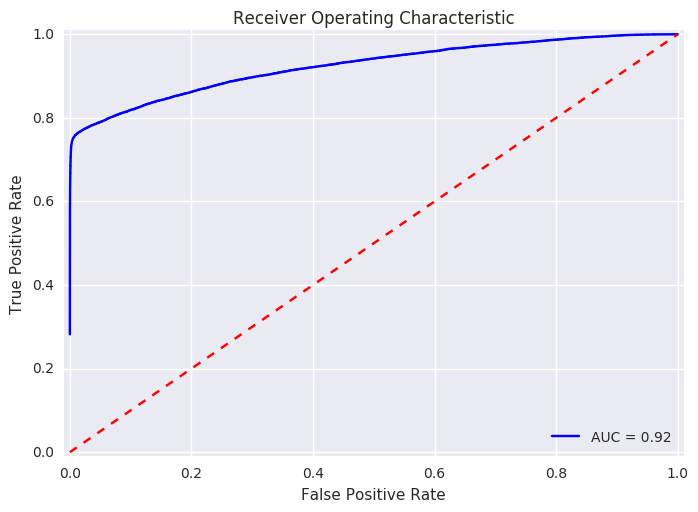

In [55]:
y_test_mapped = y_test.map({"Current": 0, "Default": 1})
metrics.roc_auc_score(y_test_mapped, y_pred_proba)
plot_roc_curve(y_test_mapped, y_pred_proba)

### References

https://www.kaggle.com/wendykan/lending-club-loan-data/data
 

https://github.com/dformoso/sklearn-classification


https://www.kaggle.com/vincepota/predicting-customers-who-will-charge-off
 

Guide to Encoding Categorical Values in Python

http://pbpython.com/categorical-encoding.html



sklearn API Reference

http://scikit-learn.org/stable/modules/classes.html#module-sklearn.model_selection

sklearn Model evaluation

http://scikit-learn.org/stable/modules/model_evaluation.html

